## SAR (Synthetic Aperture Radar ) - Ship Detection 

High-Resolution SAR Images Dataset (HRSID) contains 116 co-polarized and 20 cross polarized SAR images

The HRSID dataset contains 5604 images have dimension 800 x 800 pixels, resolution of 96 dpi, and there are in the .jpg format 

In [17]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob 
import random
import os

## Visulaize images from the dataset 

In [18]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

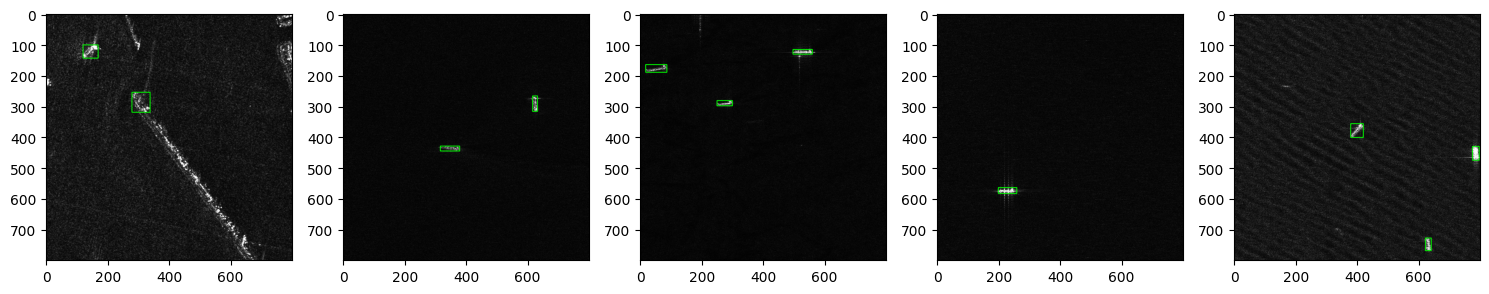

Mapping complete.


In [37]:
import cv2
import os
import json
import random
import matplotlib.pyplot as plt

# Path to your dataset directory containing images
dataset_dir = "C:\\Users\\thatw\\\\akash\\Suhora Project\\HRSID_jpg\\HRSID_JPG\\JPEGImages"

# Path to your annotation file
annotation_file = "C:\\Users\\thatw\\akash\\Suhora Project\\HRSID_jpg\\HRSID_JPG\\annotations\\train2017.json"  # Assuming annotations folder is located inside the dataset directory
annotation_path = os.path.join(dataset_dir, "..", annotation_file)

# Load annotation data
with open(annotation_path, 'r') as f:
    annotation_data = json.load(f)

# Randomly select 5 images
random_images = random.sample(annotation_data['images'], 5)

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Loop through each randomly selected image
for ax, image_info in zip(axes, random_images):
    img_file = image_info['file_name']
    img_id = image_info['id']

    img_path = os.path.join(dataset_dir, img_file)

    # Load the image
    image = cv2.imread(img_path)

    # Find annotations for this image
    annotations = [ann for ann in annotation_data['annotations'] if ann['image_id'] == img_id]

    # Process annotations and draw bounding boxes on the image
    for annotation in annotations:
        bbox = annotation['bbox']
        x, y, w, h = bbox
        cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)

    # Convert the image from BGR to RGB (matplotlib uses RGB)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with annotations
    ax.imshow(image_rgb)
    ax.axis('on')

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()
plt.show()

print("Mapping complete.")


Observtion - The above plots are the mapped images from its respective annotation 

## Dataset ship_v8.yaml file

In [20]:
%%writefile ship_v8.yaml
path: "C:\\Users\\thatw\\akash\\Suhora Project"
train: "C:\\Users\\thatw\\akash\\Suhora Project\\train\\images"
val: "C:\\Users\\thatw\\akash\\Suhora Project\\test\\images"


# class names
names: 
  0: 'ship'

Overwriting ship_v8.yaml


## YOLOv8 model Training

In [22]:
from ultralytics import YOLO
model=YOLO('yolov8n.pt')
results = model.train(data='ship_v8.yaml', epochs=100, batch=8, imgsz=800,plots=True)

Ultralytics YOLOv8.1.11 🚀 Python-3.12.1 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=ship_v8.yaml, epochs=100, time=None, patience=50, batch=8, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning C:\Users\thatw\akash\Suhora Project\train\labels.cache... 3642 images, 0 backgrounds, 0 corrupt: 100%|█
val: Scanning C:\Users\thatw\akash\Suhora Project\test\labels.cache... 1962 images, 1 backgrounds, 0 corrupt: 100%|████


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 800 train, 800 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.43G      1.366      1.886      1.043         10        800: 100%|██████████| 456/456 [01:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.826      0.646      0.764      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.53G      1.299      1.073      1.035         10        800: 100%|██████████| 456/456 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.807      0.677       0.77      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.11G      1.239     0.9289      1.034          9        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.839      0.683      0.787      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.54G      1.242     0.9229      1.031          9        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.863      0.694      0.808      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.11G      1.201     0.8721       1.03          4        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.834      0.692      0.798      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.04G      1.179     0.8499      1.016          2        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.828      0.668       0.78      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.29G      1.157       0.81      1.016         12        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.837      0.706      0.802      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.39G      1.126     0.7808     0.9951          6        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.851      0.735      0.831       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.11G      1.113     0.7708     0.9979          3        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.872      0.758       0.85      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.27G      1.107     0.7554     0.9863          1        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.873      0.754      0.855      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.11G      1.083     0.7316     0.9802          4        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.875      0.717      0.831      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.82G      1.081     0.7247     0.9847          7        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.867      0.739      0.842       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.77G      1.073      0.721     0.9767          1        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.887      0.742      0.847        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.24G      1.072     0.7065     0.9795          2        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.885      0.745      0.853        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.66G      1.052     0.6912     0.9665          2        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.858      0.759      0.857      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.38G      1.043     0.6845     0.9716          3        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.893      0.743      0.862      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.38G      1.038      0.685     0.9697         12        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922       0.89      0.748      0.855      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.65G      1.043     0.6806     0.9715          5        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.882      0.746      0.858      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.3G      1.034     0.6886     0.9666          5        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.865      0.725      0.834      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.43G      1.031     0.6679     0.9622         11        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.878      0.756      0.857      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.58G      1.014     0.6576       0.96          4        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.881      0.767      0.864      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.62G       1.02     0.6628     0.9628         13        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.898      0.765      0.875      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.29G      1.022     0.6635     0.9678          8        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.896      0.765      0.869      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.11G      1.002     0.6485     0.9558         10        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.904      0.773      0.876      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.25G      1.009     0.6522       0.96          7        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.891      0.767      0.868       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.77G     0.9883     0.6375     0.9526          3        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922        0.9      0.759      0.871      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.07G     0.9833     0.6313      0.951          6        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.904      0.767       0.87      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.23G      1.007     0.6398     0.9604         11        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922       0.89      0.763      0.871       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.44G     0.9816     0.6298     0.9497          9        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.893      0.759      0.873      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.43G     0.9705     0.6175     0.9423          3        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.885      0.774      0.878      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.29G     0.9726     0.6097     0.9421          9        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.895      0.766      0.874      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.33G     0.9868     0.6154     0.9499          9        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.889      0.787      0.884      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.21G     0.9547     0.5997     0.9398          3        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922       0.89      0.775      0.875      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.37G     0.9586     0.6013     0.9395          4        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.905      0.772       0.88      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.12G     0.9492     0.6039     0.9451          3        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.902       0.78      0.884      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.32G     0.9676     0.6083     0.9487          1        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.898       0.77       0.88      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.31G      0.959     0.6039     0.9445         14        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.883      0.789      0.884      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.12G      0.959     0.5986     0.9409          8        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.893      0.775      0.876      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.13G     0.9606     0.5945     0.9385          5        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.889      0.787      0.881      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.32G     0.9597     0.5883     0.9416         20        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.896      0.791      0.888      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.39G     0.9448     0.5936     0.9432          1        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.893      0.771      0.875      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.39G     0.9443     0.5874     0.9413          4        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.889      0.794      0.889      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.16G     0.9514     0.5837     0.9383          5        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.891      0.789      0.889      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.52G     0.9382     0.5883     0.9313          2        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.895      0.781      0.885      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.44G     0.9321     0.5625     0.9252          1        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.892      0.796      0.889      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.11G      0.934     0.5744     0.9331          2        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.899      0.792      0.892      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.08G     0.9207     0.5635     0.9279         10        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.906      0.786      0.889      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.1G       0.92     0.5601     0.9287          6        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.891      0.793      0.887      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.3G     0.9239     0.5605     0.9285         14        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.898      0.781      0.889      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.29G     0.9263     0.5592     0.9301          4        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.891       0.79      0.887      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.17G     0.9131      0.559     0.9296          3        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.909      0.807      0.899      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.23G     0.9197      0.557     0.9214          8        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.889      0.805      0.896      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.41G     0.8989     0.5411     0.9174          2        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922       0.91      0.795      0.894      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.51G     0.9184     0.5525     0.9323         20        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.909      0.794      0.894      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.48G     0.9048     0.5437     0.9205          3        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.898      0.805      0.894      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.56G     0.9044     0.5395     0.9171          5        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922       0.92      0.794        0.9      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.3G      0.906     0.5471     0.9209          4        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.906      0.801      0.897      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.7G     0.9081     0.5475     0.9228          4        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922       0.91      0.801      0.897      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.17G     0.8885     0.5368     0.9136          9        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.904      0.803      0.897      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.48G     0.8942     0.5305     0.9203          6        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.902      0.805      0.899      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.13G     0.8982     0.5398     0.9261          4        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.912      0.811        0.9      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.21G     0.8907     0.5324     0.9168          0        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.895      0.804      0.898      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.6G     0.8914     0.5311     0.9128          3        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.894      0.817      0.903      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.27G     0.8847     0.5202     0.9165          2        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.912       0.81      0.902      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.51G     0.8925     0.5311     0.9111          4        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922       0.91      0.809      0.903      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.55G      0.887     0.5229     0.9115          6        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.908      0.811      0.903      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.15G     0.8845     0.5202     0.9151          4        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922       0.91      0.814      0.907      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.28G     0.8739     0.5159      0.908          4        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.899      0.812      0.901      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.42G     0.8725     0.5176     0.9085          3        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.903      0.807      0.904      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.23G     0.8842     0.5166     0.9147         10        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.905       0.82      0.906      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.25G     0.8811     0.5109     0.9091          1        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.897      0.816      0.907      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.14G     0.8659      0.507     0.9068          6        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.902      0.825      0.908      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.11G     0.8675     0.5036     0.9075         19        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922        0.9      0.816      0.905      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.27G       0.86     0.4998     0.9029          3        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.908      0.822      0.909      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.11G     0.8512     0.4958     0.9051          8        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.894      0.819      0.908      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.33G     0.8579      0.511     0.9117          3        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.897      0.809      0.899      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.21G     0.8511     0.4936     0.9045          6        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.904      0.826      0.912      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.43G     0.8542     0.4905     0.9032          6        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.906      0.825      0.909      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.26G     0.8475     0.4916     0.9015          3        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.899      0.827      0.908      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.41G     0.8469     0.4907     0.9007         14        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.914      0.825      0.912      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.18G     0.8605     0.4988     0.9089          3        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.914      0.822      0.912      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.46G     0.8384     0.4851     0.9012          2        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.906      0.821      0.912      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.57G     0.8354     0.4811      0.901         10        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.911      0.818      0.909      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.44G     0.8466     0.4856     0.9049          5        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.912      0.823      0.913      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.09G     0.8428     0.4813     0.8978          5        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922       0.91      0.824      0.914      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.21G     0.8347     0.4747     0.9016          5        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.906      0.831      0.914       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.06G     0.8426     0.4831     0.9004          3        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.912      0.824      0.912      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.73G     0.8297     0.4783     0.8973         11        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.915      0.826      0.916      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.34G     0.8314     0.4746     0.8958          5        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922        0.9      0.834      0.912      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.65G     0.8435     0.4764     0.8989          2        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.906      0.831      0.914      0.672
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.44G     0.8122     0.4604     0.8999          2        800: 100%|██████████| 456/456 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.908      0.839      0.917      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.42G        0.8     0.4535     0.8993         41        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.904      0.836      0.916      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.41G     0.8012     0.4541     0.8964          4        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.898      0.844      0.917      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.1G      0.803     0.4496     0.9004          7        800: 100%|██████████| 456/456 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.908      0.833      0.918      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.49G     0.7959     0.4438     0.8924          6        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.912      0.832      0.916      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.43G      0.792     0.4467     0.8953          2        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.915      0.835      0.918       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.16G     0.7829     0.4444     0.8908          4        800: 100%|██████████| 456/456 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.908      0.839      0.919      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.55G     0.7865     0.4392     0.8903          6        800: 100%|██████████| 456/456 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.905      0.843      0.919      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.61G     0.7817     0.4361     0.8885         16        800: 100%|██████████| 456/456 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.906      0.839      0.919      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.65G     0.7804     0.4362     0.8877          3        800: 100%|██████████| 456/456 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:

                   all       1962       5922      0.907      0.839      0.918      0.682



100 epochs completed in 3.165 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.3MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.1.11 🚀 Python-3.12.1 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [00:


                   all       1962       5922      0.907      0.839      0.918      0.682
Speed: 0.4ms preprocess, 4.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs\detect\train


## Evaluation on Valdiation Images

In [23]:
from ultralytics import YOLO

In [24]:
infer=YOLO("C:\\Users\\thatw\\akash\\Suhora Project\\runs\\detect\\train\\weights\\best.pt")

In [25]:
infer.predict("C:\\Users\\thatw\\akash\\Suhora Project\\test\\images", save=True, save_txt=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1962 C:\Users\thatw\akash\Suhora Project\test\images\P0001_0_800_10190_10990.jpg: 800x800 2 ships, 47.8ms
image 2/1962 C:\Users\thatw\akash\Suhora Project\test\images\P0001_1200_2000_10190_10990.jpg: 800x800 2 ships, 48.3ms
image 3/1962 C:\Users\thatw\akash\Suhora Project\test\images\P0001_1200_2000_3600_4400.jpg: 800x800 2 ships, 48.0ms
image 4/1962 C:\Users\thatw\akash\Suhora Project\test\images\P0001_1800_2600_0_800.jpg: 800x800 1 ship, 32.0

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ship'}
 obb: None
 orig_img: array([[[43, 43, 43],
         [27, 27, 27],
         [14, 14, 14],
         ...,
         [ 7,  7,  7],
         [10, 10, 10],
         [ 0,  0,  0]],
 
        [[ 9,  9,  9],
         [15, 15, 15],
         [21, 21, 21],
         ...,
         [20, 20, 20],
         [17, 17, 17],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [18, 18, 18],
         [18, 18, 18],
         ...,
         [18, 18, 18],
         [15, 15, 15],
         [35, 35, 35]],
 
        ...,
 
        [[19, 19, 19],
         [23, 23, 23],
         [37, 37, 37],
         ...,
         [16, 16, 16],
         [18, 18, 18],
         [13, 13, 13]],
 
        [[30, 30, 30],
         [17, 17, 17],
         [15, 15, 15],
         ...,
         [17, 17, 17],
         [22, 22, 22],
         [29, 29, 29]],
 
        [[16, 16, 16],
      

## Metric Score 

In [33]:
import pandas as pd

# Load results.csv
df = pd.read_csv("C:\\Users\\thatw\\akash\\Suhora Project\\runs\\detect\\train\\results.csv")

# Assuming 'precision', 'recall', 'class', and 'mAP' are columns in your results.csv
precision = df['   metrics/precision(B)']
recall = df['      metrics/recall(B)']
mAP = df['       metrics/mAP50(B)']

# Compute mean of mAP across all epochs
mean_mAP = mAP.mean()
Mean_precision = precision.mean()
Mean_recall = recall.mean()
print("precision:", Mean_precision)
print("recall:", Mean_recall)
print("Mean Average Precision (mAP):", mean_mAP)

precision: 0.8932955999999999
recall: 0.7872863000000001
Mean Average Precision (mAP): 0.8830861999999999


Note: The precision and recall scores are the Mean average score from the results.csv